<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-141-mna/blob/main/Actividad_de_semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

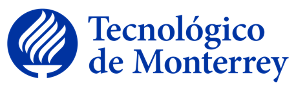

---
**Maestría en Inteligencia Artificial**
 
Ciencia y Analítica de Datos

Actividad Semanal – 4

---

Profesor Titular: Jobish Vallikavungal Devassia

Profesor Asistente: Maricarmen Vázquez Rojí

Tutor: César Adolfo Ortega Vivas

---

Alumnos:

Jorge Arturo Federico Rivera: A01250724

César Flores Vivanco: A01173318

11 de octubre de 2022

Parte 1

Se importan los datos a Python desde el URL proveído en la actividad

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

csv_url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(csv_url)
df.drop("ID", inplace=True, axis=1)

Se filtran y preparan los datos como visto en las semanas anteriores: se revisa si son válidos los datos y se procede a eliminar los registros con valores NA.

In [ ]:
OPTIONS = {
    "X2": [1, 2],
    "X3": [1, 2, 3, 4],
    "X4": [1, 2, 3],
    "X6": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X7": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X8": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X9": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X10": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X11": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
}

filtered_df = df.copy()

for column in OPTIONS.keys():
  filtered_df = filtered_df[filtered_df[column].isin(OPTIONS[column])]

nona_filtered_df = filtered_df.dropna()

Se inicia el proceso de PCA con los datos "limpios", se procede a analizar la información obtenida desde la función PCA de sklearn.

In [1]:
# print(nona_filtered_df.isna().any())

pca_df = nona_filtered_df

# print(pca_df.head())
# print(pca_df.describe())

pcs = PCA()

pcs.fit(preprocessing.scale(pca_df))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          ).transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
# pcsSummary_df.round(4)
pcsSummary_df.round(4).iloc[:, :14]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4793,2.1137,1.2602,1.2284,1.0166,0.9975,0.9703,0.9396,0.9386,0.9157,0.8763,0.8234,0.8157,0.7541
Proportion of variance,0.2561,0.1862,0.0662,0.0629,0.0431,0.0415,0.0392,0.0368,0.0367,0.0349,0.0320,0.0283,0.0277,0.0237
Cumulative proportion,0.2561,0.4423,0.5084,0.5713,0.6144,0.6558,0.6951,0.7318,0.7685,0.8035,0.8355,0.8637,0.8914,0.9151


Se necesita hasta el componente PC14 para contar con mas del 90% de la variabilidad, que será nuestro target en este ejercicio.

Se procede a graficar el Scree Plot de estos componentes.

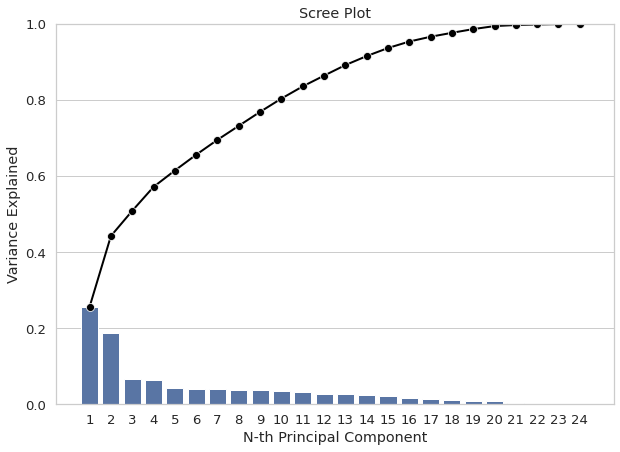

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Se revisan los 14 componentes seleccionados y su relación con cada una de las features del dataset

In [3]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = pca_df.columns
                                )
pcsComponents_dfX.iloc[:, :14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.194991,0.212108,0.062225,0.075411,-0.155329,-0.201990,-0.334887,-0.087679,-0.062465,0.011759,0.002434,0.029065,0.017767,0.302617
X2,-0.007737,0.027042,0.006223,-0.091091,0.786269,-0.543504,-0.092405,-0.102954,-0.049050,-0.048360,0.009180,-0.002972,-0.004371,0.201247
X3,-0.028770,-0.087492,-0.305798,0.298127,0.321538,0.152536,0.540116,0.387784,0.159725,0.055702,0.108530,-0.178476,-0.013937,0.029364
X4,-0.024231,-0.009921,0.356116,-0.508248,-0.056854,0.181392,0.271193,0.165052,0.086756,0.010372,0.062823,-0.103103,0.007980,0.672190
X5,0.041210,0.022450,-0.363422,0.540086,-0.139677,0.043041,-0.153561,-0.016717,-0.042775,0.005255,0.006697,0.020653,0.012058,0.624535
X6,0.065723,-0.357174,0.032758,0.041222,-0.072727,-0.147766,0.221060,-0.137045,0.061149,-0.067916,-0.018794,0.359391,0.089910,0.043362
X7,0.055241,-0.373618,0.031290,0.030892,-0.080580,-0.152382,0.157545,-0.058646,0.032631,0.007786,0.011731,0.447070,0.135260,0.037593
X8,0.051853,-0.383025,0.082263,0.044983,-0.023171,-0.065849,-0.009876,0.070128,-0.024463,0.037343,-0.054285,0.268604,-0.143112,0.055018
X9,0.052205,-0.388955,0.113487,0.060212,0.028375,0.019109,-0.198726,0.163025,-0.029191,0.040242,-0.085027,-0.088935,0.013565,0.035629
X10,0.057983,-0.379911,0.132605,0.060020,0.063264,0.088391,-0.283948,0.146685,-0.065633,0.007387,0.107316,-0.260254,-0.012770,-0.013862


Utilizamos valores absolutos para evitar problemas con signos y se prosigue a crear un set de datos únicos de los features que se ven que son los más representativos en cada uno de los componentes (los tres mayores de cada componente, en específico).

In [27]:
largest_features_pcs = list()

for column in pcsComponents_dfX.iloc[:, :14]:
  largest_features_pcs.append(np.abs(pcsComponents_dfX.loc[:, column]).nlargest(3))

relevant_features_pcs = pd.concat(largest_features_pcs).index.unique().sort_values()
print(relevant_features_pcs)

Index(['X1', 'X10', 'X14', 'X15', 'X16', 'X18', 'X19', 'X2', 'X20', 'X21',
       'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'],
      dtype='object')


Se obtiene que X11, X12, X13 y X17 no son tan relevantes para el análisis y, en teoría, debería de haber posibilidad de retirarlos del dataset sin afectar significativamente a los resultados.

In [31]:
np.abs(pcsComponents_dfX.iloc[:, :14].mean(axis=1)).sort_values(ascending=False)

Y      0.117581
X19    0.114623
X3     0.102782
X20    0.099897
X23    0.081065
X4     0.079394
X21    0.059075
X5     0.042845
X22    0.034673
X15    0.026318
X10    0.025195
X11    0.025089
X16    0.024498
X14    0.020557
X7     0.020130
X9     0.018928
X18    0.016375
X12    0.015296
X6     0.008082
X13    0.007248
X17    0.007029
X8     0.006685
X2     0.006251
X1     0.004716
dtype: float64

Parte 2


1. ¿Cuál es el número de componentes mínimo y por qué?
> En este ejemplo, se optaron por 14 componentes ya que estos representan el 90% de la variabilidad de los datos. Sin embargo, se podrían tomar más o menos componentes dependiendo de lo que busque el data scientist.
2. ¿Cuál es la variación de los datos que representan esos componentes?
> Se llega a 91.51% con 14 componentes. Si se toma uno menos, todavía se obtendría un valor aceptable de ~89.14%, pero se optó manejar un target de >90% de la variabilidad para este ejercicio.
3. ¿Cuál es la pérdida de información después de realizar PCA?
> Se eliminarían 4 de las columnas de la base de datos original, las cuales serían X11, X12, X13 y X17 (5 columnas si se cuenta la de ID).
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
> Según un cálculo de los promedios de los coeficientes hechos en los resultados finales, se encontró que los que tienen mayor importancia son: X19, X3, X20, X23 y X4. Mientras que los que tienen menor importancia son X1, X2, X8, X17 y X13.
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
> Entre los casos de uso principales donde un PCA se ve necesario hacer es cuando los sets de datos tienen muchas features (o columnas) y se desea reducir la cantidad de datos a alimentar a los modelos, ya sea para ayudar en el desempeño del mismo, para reducir los tiempos de entrenamiento o los costos de almacenamiento de los datos. De esta manera, se puede tener un mayor nivel de seguridad de que se está retirando información de los sets de datos que no sean críticas para el análisis que se llevará a cabo.